In [1]:
using Pkg;
Pkg.activate(".")
using Plots, CSV, DataFrames, Polynomials, BasicInterpolators, LinearAlgebra

  Activating project at `~/Documents/Spring2024/NumericalAnalysis/NA-FinalProject/src`


In [2]:
data = CSV.File(open("../data/03-26-Stadium/Location.csv")) |> DataFrame

Row,time,seconds_elapsed,bearingAccuracy,speedAccuracy,verticalAccuracy,horizontalAccuracy,speed,bearing,altitude,longitude,latitude
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1711486964061000000,0.804,45.0,1.5,1.98934,29.051,0.0,0.0,23.1,-82.3451,29.6486
2,1711486967796752000,4.53975,67.2645,5.35765,2.01841,27.633,0.44614,86.3977,23.1,-82.3453,29.6488
3,1711486968796806400,5.53981,45.0,2.26927,2.02841,22.892,0.657532,70.7693,23.1,-82.3453,29.6488
4,1711486969796762600,6.53976,45.0,1.5,2.03841,21.208,1.35553,261.445,23.1,-82.3452,29.6488
5,1711486970796793000,7.53979,44.5612,1.12645,2.04841,18.948,1.02149,271.446,23.1,-82.3453,29.6488
6,1711486970976000000,7.719,45.0,1.5,2.66057,23.645,1.01516,271.461,23.8,-82.3453,29.6488
7,1711486971290419700,8.03342,45.0,1.5,2.66057,26.783,1.00305,271.494,23.8,-82.3453,29.6488
8,1711486971796735200,8.53974,45.0,0.391436,2.67129,26.701,1.2399,283.561,23.8,-82.3453,29.6488
9,1711486971985868300,8.72887,45.0,0.41843,2.67129,26.522,1.28683,279.207,23.8,-82.3453,29.6488


In [3]:
@show data

data = 929×11 DataFrame
 Row │ time                 seconds_elapsed  bearingAccuracy  speedAccuracy  verticalAccuracy  horizontalAccuracy  speed     bearing   altitude  longitude  latitude
     │ Int64                Float64          Float64          Float64        Float64           Float64             Float64   Float64   Float64   Float64    Float64
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 1711486964061000000          0.804            45.0          1.5                1.98934              29.051  0.0         0.0      23.1      -82.3451   29.6486
   2 │ 1711486967796752000          4.53975          67.2645       5.35765            2.01841              27.633  0.44614    86.3977   23.1      -82.3453   29.6488
   3 │ 1711486968796806400          5.53981          45.0          2.26927            2.02841              22.892  0.657532   70.7693   23.1      -82.3

Row,time,seconds_elapsed,bearingAccuracy,speedAccuracy,verticalAccuracy,horizontalAccuracy,speed,bearing,altitude,longitude,latitude
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1711486964061000000,0.804,45.0,1.5,1.98934,29.051,0.0,0.0,23.1,-82.3451,29.6486
2,1711486967796752000,4.53975,67.2645,5.35765,2.01841,27.633,0.44614,86.3977,23.1,-82.3453,29.6488
3,1711486968796806400,5.53981,45.0,2.26927,2.02841,22.892,0.657532,70.7693,23.1,-82.3453,29.6488
4,1711486969796762600,6.53976,45.0,1.5,2.03841,21.208,1.35553,261.445,23.1,-82.3452,29.6488
5,1711486970796793000,7.53979,44.5612,1.12645,2.04841,18.948,1.02149,271.446,23.1,-82.3453,29.6488
6,1711486970976000000,7.719,45.0,1.5,2.66057,23.645,1.01516,271.461,23.8,-82.3453,29.6488
7,1711486971290419700,8.03342,45.0,1.5,2.66057,26.783,1.00305,271.494,23.8,-82.3453,29.6488
8,1711486971796735200,8.53974,45.0,0.391436,2.67129,26.701,1.2399,283.561,23.8,-82.3453,29.6488
9,1711486971985868300,8.72887,45.0,0.41843,2.67129,26.522,1.28683,279.207,23.8,-82.3453,29.6488


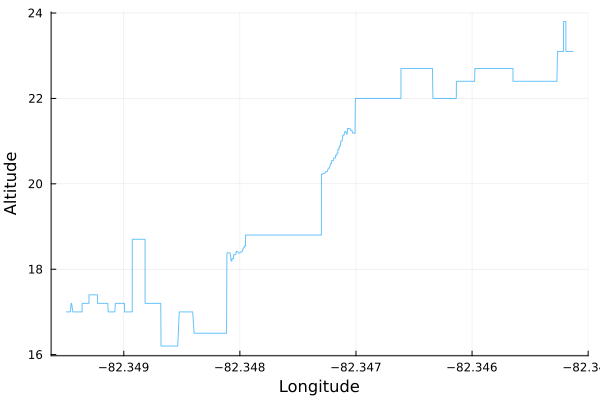

In [4]:
x = data[:, end-1];
z = data[:, end-2];

# x = (x .+ 82.349) .* 1000
sort!(x, rev=true)
# scatter(x, z, label=:, markersize=1)
plot(x, z, label=:none, xlabel="Longitude", ylabel="Altitude", alpha=0.6)

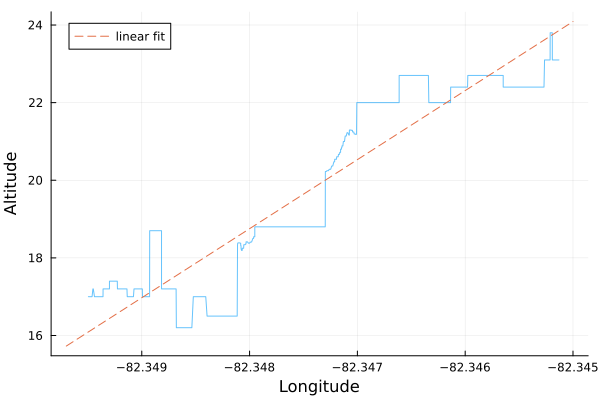

In [5]:
V = [x.^0 x]
c = V\z
p = Polynomial(c)

f = a -> p(a)
plot!(f, -82.3497, -82.345, label="linear fit", l=:dash)


V = BigFloat[1.0 -82.34513060000000450600055046379566192626953125 6780.720533531057299114763736724853515625 -558359.317895716638304293155670166015625; 1.0 -82.3451902999999987287083058618009090423583984375 6780.7303655432142477366141974925994873046875 -558360.532323644496500492095947265625; 1.0 -82.34519050000000106592779047787189483642578125 6780.7303984812906492152251303195953369140625 -558360.536392082809470593929290771484375; 1.0 -82.3451912000000021407686290331184864044189453125 6780.730513764558054390363395214080810546875 -558360.5506316167302429676055908203125; 1.0 -82.3451916000000068152075982652604579925537109375 6780.7305796407117668422870337963104248046875 -558360.558768493472598493099212646484375; 1.0 -82.345191999999997278791852295398712158203125 6780.730645516863660304807126522064208984375 -558360.566905370098538696765899658203125; 1.0 -82.34519249999999601641320623457431793212890625 6780.730727862055573496036231517791748046875 -558360.57707646605558693408966064453125; 1.

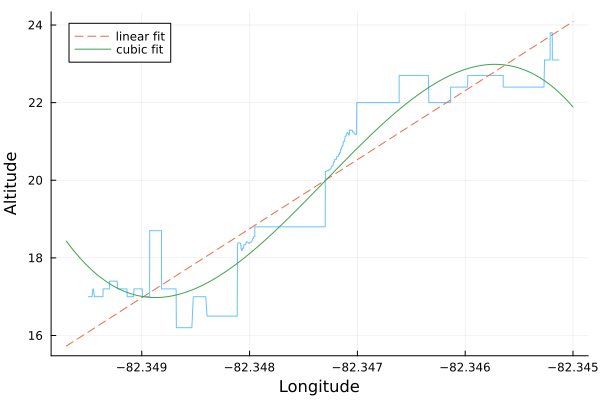

In [6]:
V = BigFloat.([x[i]^j for i in 1:length(x), j in 0:3])

@show V


p = Polynomial(V\z)
plot!(f, -82.3497, -82.345, label="cubic fit")


Below is the spline interpolation taken directly from the textbook. I don't like his conventions, but you can think of $t$ as being an $x$ value, and $y$ being the altitude at a given $x$. 

In [8]:
"""
    spinterp(t,y)

Construct a cubic not-a-knot spline interpolating function for data
values in `y` given at nodes in `t`.
"""
function spinterp(t,y)
    n = length(t)-1
    h = [ t[k+1]-t[k] for k in 1:n ]

    # Preliminary definitions.
    Z = zeros(n,n);
    In = I(n);  E = In[1:n-1,:];
    J = diagm(0=>ones(n),1=>-ones(n-1))
    H = diagm(0=>h)

    # Left endpoint interpolation:
    AL = [ In Z Z Z ]
    vL = y[1:n]

    # Right endpoint interpolation:
    AR = [ In H H^2 H^3 ];
    vR = y[2:n+1]

    # Continuity of first derivative:
    A1 = E*[ Z J 2*H 3*H^2 ]
    v1 = zeros(n-1)

    # Continuity of second derivative:
    A2 = E*[ Z Z J 3*H ]
    v2 = zeros(n-1)

    # Not-a-knot conditions:
    nakL = [ zeros(1,3*n) [1 -1 zeros(1,n-2)] ]
    nakR = [ zeros(1,3*n) [zeros(1,n-2) 1 -1] ]

    # Assemble and solve the full system.
    A = [ AL; AR; A1; A2; nakL; nakR ]
    v = [ vL; vR; v1; v2; 0; 0 ]
    z = A\v

    # Break the coefficients into separate vectors.
    rows = 1:n
    a = z[rows]
    b = z[n.+rows];  c = z[2*n.+rows];  d = z[3*n.+rows]
    S = [ Polynomial([a[k],b[k],c[k],d[k]]) for k in 1:n ]

    # This function evaluates the spline when called with a value
    # for x.
    return function (x)
        if x < t[1] || x > t[n+1]    # outside the interval
            return NaN
        elseif x==t[1]
            return y[1]
        else
            k = findlast(x .> t)    # last node to the left of x
            return S[k](x-t[k])
        end
    end
end

spinterp

In [9]:
# S = spinterp(x, z)

In [11]:
x2 = reverse(x)

xs = [x2[i] for i in 1:50:length(x2)]
zs = [z[i] for i in 1:50:length(x)]

csi = CubicSplineInterpolator(xs, zs, NoBoundaries())

@show csi
@show x2[end]

ps = [csi(i) for i in x2]


# itp = interpolate(xs, zs, Gridded(Cubic()))

csi = CubicSplineInterpolator{Float64, NoBoundaries} ∈ [-82.3494951, -82.3452435]
x2[end] = -82.3451306


929-element Vector{Float64}:
 23.100000381469727
 23.079799626267718
 23.037051712328328
 23.029541146825995
 23.022376984524083
 23.001939439197248
 22.98664725289796
 22.98393230121239
 22.95786503249558
 22.947406723397815
  ⋮
 17.42849750636324
 17.43879485056329
 17.43924096029504
 17.441469469047806
 17.443249812397124
 17.445027947491592
 17.448134318917546
 17.44902058910226
 17.678845291861208

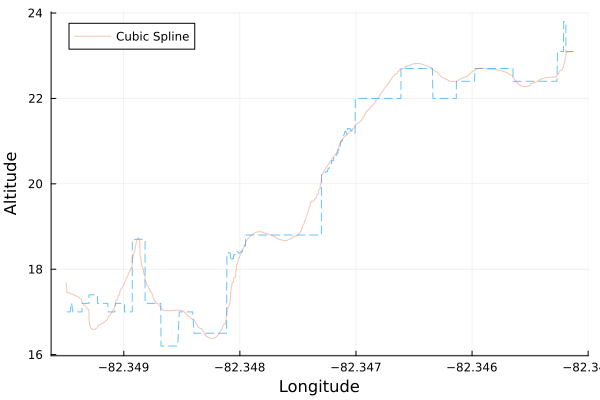

In [12]:
plot(x, z, label=:none, xlabel="Longitude", ylabel="Altitude", alpha=0.6, ls=:dash)
plot!(x, ps, label="Cubic Spline", alpha=0.4)



In [13]:
function access_spaced_elements(vec, z, n=10)
     len = length(vec)
     indices = round.(Int, LinRange(1, len, n))
    #  @show indices
     xs = reverse(vec[indices])
     zs = z[indices]
     return xs, zs
 end

access_spaced_elements (generic function with 2 methods)

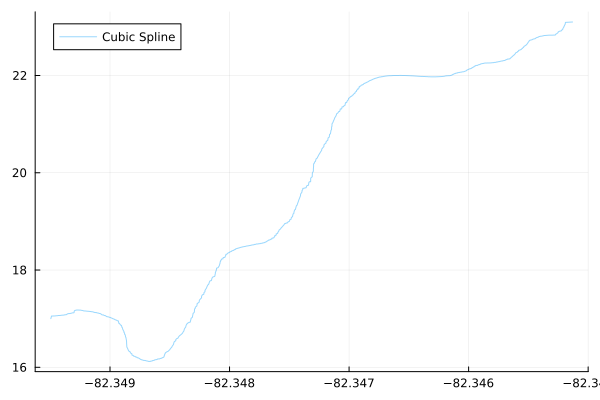

In [14]:
xs, zs = access_spaced_elements(x, z, 10)

csi = CubicSplineInterpolator(xs, zs, NoBoundaries())

ps = [csi(i) for i in x2]

plot(x, ps, label="Cubic Spline", alpha=0.4)



In [15]:
function plot_dif_cubic_samples(plt, x, z, n, a=0.4)
     xs, zs = access_spaced_elements(x, z, n)
     csi = CubicSplineInterpolator(xs, zs, NoBoundaries())
     ps = [csi(i) for i in x2]
     plot!(plt, x, ps, label="n=$n", alpha=a, ls=:dash)
end


plot_dif_cubic_samples (generic function with 2 methods)

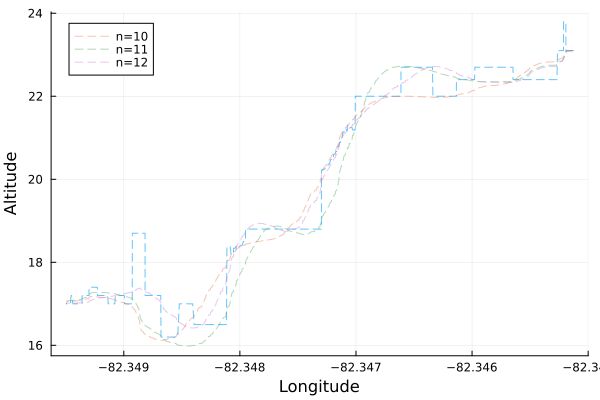

In [16]:
plt = plot(x, z, label=:none, xlabel="Longitude", ylabel="Altitude", alpha=0.6, ls=:dash)

for i = 10:1:12
     plot_dif_cubic_samples(plt, x, z, i)
end

plt

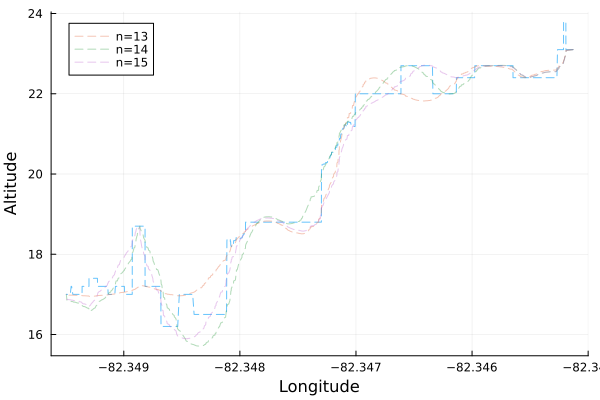

In [17]:
plt = plot(x, z, label=:none, xlabel="Longitude", ylabel="Altitude", alpha=0.6, ls=:dash)

for i = 13:1:15
     plot_dif_cubic_samples(plt, x, z, i)
end

plt

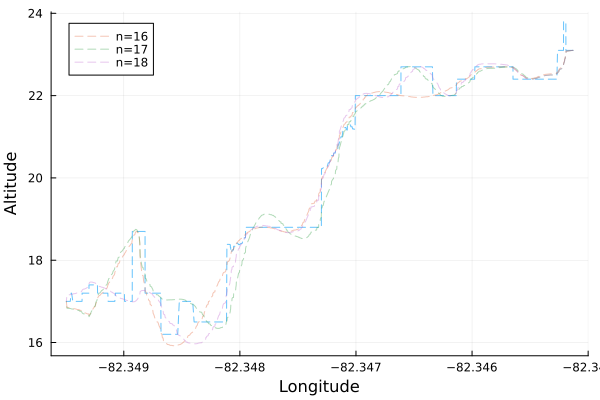

In [18]:
plt = plot(x, z, label=:none, xlabel="Longitude", ylabel="Altitude", alpha=0.6, ls=:dash)

for i = 16:1:18
     plot_dif_cubic_samples(plt, x, z, i)
end

plt

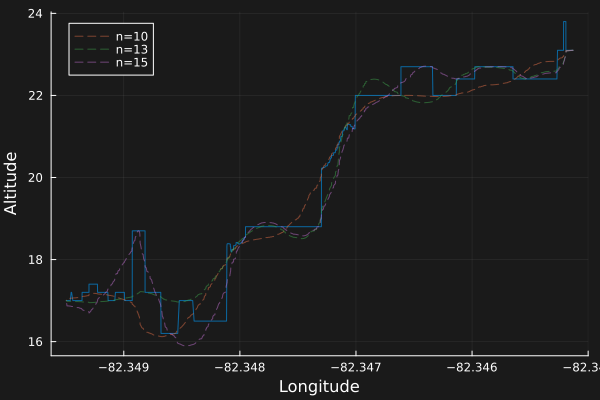

In [19]:
plt = plot(x, z, label=:none, xlabel="Longitude", ylabel="Altitude", alpha=0.6, background=:gray10)

plot_dif_cubic_samples(plt, x, z, 10, 0.5)
plot_dif_cubic_samples(plt, x, z, 13, 0.5)
plot_dif_cubic_samples(plt, x, z, 15, 0.5)


plt

In [22]:
xs, zs = access_spaced_elements(x, z, 10)
f = spinterp(xs, zs)

#15 (generic function with 1 method)

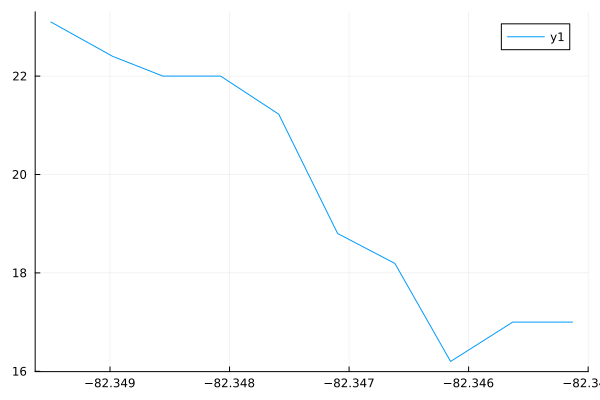

In [27]:
plt = plot(xs, f.(xs))